<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/MachinLearning/ML_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ML_day4 정리

머신러닝 과정:   
데이터 수집 > 데이터 정제 및 전처리 > 데이터 변환 (행렬, 벡터 수치화) > 특성 추출, 선택을 통한 차원 축소

#### 교차검증 - Kfold와 StratifiedKfold (n_split) :   
데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것

RepeatedKFold, StratifiedRepeatedKFold :  
교차 검증을 반복하여 실행시키기 위해 사용하는 클래스

cross_val_score(scoring): 분류 분석 예측 평가 함수

분류 분석 예측 평가 지표 :
Acuuracy : TP + TN / (TP + FN + FP + TN)

정밀도(precision)  : 양성으로 예측한 샘플 중에서 진짜 양성 비율  TP/ (TP + FP)  

재현율(recall) : 진짜 양성 샘플 중에서 양성으로 예측한 비율  TP/ (TP + FN)

정밀도와 재현율의 조화 평균 : F1 = (precision X recall) / (precision + recall) X 2  


ROC : 정밀도와 재현율의 임계값의 변화에 따라 평가 지표 변화를 곡선 형태로 표현하는 지표  
ROC곡선 아래 면적 - AUC  
precision_recall_curve()  
cross_validate()  

confusion_martrix() - 오차 행렬 반환

precision_socre(), recall_score(), accuracy_score()  

predict_proba() - 개별 데이터별로 예측 확률을 반환


#### 회귀모델 평가 - 실제값과 예측값의 차이 (오차, 잔차)

잔차 계산하는 방식 - MAE, MSE, RMSE, MAPE, MPE, MSLE, RMSLE  
희귀 모델 설명력 평가 지표 - 예측값 Variance/ 실제값 Variance, R²

#### 군집(클러스터링) 모델 평가 

실루엣 계수 : 분자는 군집 간 거리의 최소값이며 분모는 군집 내에서 거리의 최대값 지표를 사용함

silgouette_score() : -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처 군집과 더 멀리 떨어져 있는 것이고 0에 가까워질수록 근처 군집과 가까운 것이다  

클러스터링 개수 :   
1. Silhouette Method을 이용한 군집의 개수 결정
2. Elbow Method을 이용한 군집의 개수 결정 
3. 계층적 군집분석의 덴드로그램 시각화를 이용한 군집의 개수 결정



#### 이미지 처리
커널 :  이미지를 흐리게 하려면 각 픽셀을 주변 픽셀의 평균값으로 변환, 투명도 처리에 수행되는 연산

cv2.blur(), filter2D(), GaussianBlur()  

히스토그램 평활화, equalizeHist() - 관심 대상을 다른 객체나 배경과 잘 구분되도록 만드는 이미지 대비 높이기

bitwise_and() : 이미지에서 한 색상을 구분하려면 색 범위를 정의하고 이미지에 마스크를 적용

이미지 이진화 - thresholding, adaptive, thresholding

이미지의 전경만 분리해내려면 원하는 전경 주위에 사각형 박스를 그리고 그랩컷 알고리즘을 실행

경계선 감지 - 캐니(Canny) 경계선 감지기

모서리 감지기 - cornerHarris(), Shi-Tomasi 모서리 감지기(goodFeatyresToTrack)

flatten() : 이미지 데이터가 담긴 다차원 배열을 1차원의 벡터로 변환





### ML_day5 시작

#### 모델 선택

LogisticRegression:  
선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 표준 스케일링으로 변환 후 데이터 셋을 분리  
panalty는 규제의 유형  
C는 규제 강도 - C 값이 작을 수록 규제 강도가 크다

#### GridSearchCV  

• 완전 탐색을 사용해 최선의 모델 선택  

• 하이퍼파라미터 범위를 검사하여 최선의 모델을 선택하려면 사이킷런의 GridSearchCV를 사용합니다.

• 사용자는 하나 이상의 하이퍼파라미터에 대해 가능성이 있는 값을 정의합니다.

• GridSearchCV는 모든 값의 조합에 대해 모델을 훈련하고 최고 성능 점수를 내는 모델이 최선의 모델로 선택됩니다.

• GridSearchCV는 교차검증을 사용하여 모델을 선택하는 브루트포스(brute-force)한 방법입니다.

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#로지스틱 회귀에서 C와 규제 페널티 값의 각 조합에 대해 모델을 훈련하고 k-폴드 교차검증으로 평가.
#C의 값이 10개이고 규제 페널티는 두 개, 폴드 수는 5( 총 10X2X5=100개의 모델 후보 중에서 가장 좋은 것을 선택)
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LogisticRegression

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

logistic = linear_model.LogisticRegression(solver='liblinear', max_iter=1000)  # 로지스틱 회귀 모델 객체 생성
penalty = ['l1', 'l2'] # 페널티(penalty) 하이퍼파라미터 값의 후보를 만듭니다.

C = np.logspace(0, 4, 10) # 규제 하이퍼파라미터 값의 후보 범위를 만듭니다.
print(C)

hyperparameters = dict(C=C, penalty=penalty) # 하이퍼파라미터 후보 딕셔너리를 만듭니다.
print(hyperparameters)

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]
{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}


• verbose 매개변수 - 탐색 시간이 긴 경우에 잘 진행되는지 확인할 수 있는 옵션

• verbose 매개변수 - 탐색 과정에서 출력되는 메시지의 양을 결정

• 0은 아무것도 출력하지 않고 1에서 3까지 갈수록 자세한 메시지를 출력

In [4]:
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0) # 그리드 서치 객체 생성
best_model = gridsearch.fit(features, target) # 그리드 서치 수행

# 최선의 하이퍼파라미터를 확인합니다.
print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C 값:', best_model.best_estimator_.get_params()['C'])

best_model.predict(features) #타깃 벡터 예측

가장 좋은 페널티: l1
가장 좋은 C 값: 7.742636826811269


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### RandomizedSearchCV

• RandomizedSearchCV는 완전 탐색보다 최선의 모델을 선택하는데 계산 비용이 적게 듭니다.

• RandomizedSearchCV는 사용자가 제공한 분포(예: 정규분포나 균등 분포)에서 랜덤한 하이퍼파라미터 조합을 지정된 횟수만큼 추출하여 조사하는 것입니다.

• RandomizedSearchCV에 분포를 지정하면 이 분포에서 중복을 허용하지 않도록 하이퍼파라미터 값을 랜덤하게 샘플링합니다.

In [5]:
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

logistic = linear_model.LogisticRegression() # 로지스틱 회귀 모델 생성
penalty = ['l1', 'l2'] # 페널티 하이퍼파라미터 후보를 만듭니다.
C = uniform(loc=0, scale=4) # 규제 하이퍼파라미터 값의 후보를 위한 분포를 만듭니다.
hyperparameters = dict(C=C, penalty=penalty) # 하이퍼파라미터 옵션을 만듭니다.

# 랜덤 서치 객체 생성
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100,
cv=5, verbose=0, n_jobs=-1)
best_model = randomizedsearch.fit(features, target) # 랜덤 서치 수행

In [6]:
# 0~4 사이의 균등 분포를 정의하고 10개의 값을 샘플링합니다.
uniform(loc=0, scale=4).rvs(10)

# 최선의 하이퍼파라미터를 확인
print('가장 좋은 페널티:', best_model.best_estimator_.get_params()['penalty'])
print('가장 좋은 C 값:', best_model.best_estimator_.get_params()['C'])

# 타깃 벡터 예측
best_model.predict(features)

가장 좋은 페널티: l2
가장 좋은 C 값: 3.730229437354635


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 최선의 모델 선택

• 다양한 학습 알고리즘과 각각의 하이퍼파라미터를 탐색하여 최선의 모델을 선택하기위해 후보 학습 알고리즘과 이에 해당하는 하이퍼파라미터의 딕셔너리를 만들어 GridSearchCV로 수행

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

np.random.seed(0) # 랜덤 시드 설정

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

#pipe 와 search_space 두 가지 학습 알고리즘을 만들기

pipe = Pipeline([("classifier", RandomForestClassifier())]) # 파이프라인을 만듭니다.

# 후보 학습 알고리즘과 하이퍼파라미터로 딕셔너리를 만듭니다.
search_space = [ { "classifier": [LogisticRegression()],
"classifier__penalty": ['l1', 'l2'],
"classifier__C": np.logspace(0, 4, 10)},
{ "classifier": [RandomForestClassifier()],
"classifier__n_estimators": [10, 100, 1000],
"classifier__max_features": [1, 2, 3]}]

In [8]:
# 그리드 서치 객체 생성, pipe 와 search_space 중 최선의 모델을 검색
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0) 
best_model = gridsearch.fit(features, target) # 그리드 서치를 수행

best_model.best_estimator_.get_params()["classifier"] # 최선의 모델을 확인

#수행 결과 LogisticRegression으로 최선의 모델이 검색됨

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
best_model.predict(features) # 타깃 벡터를 예측

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 전처리와 함께 최선의 모델 선택

• 모델 선택 과정에 전처리를 포함하려면 전처리 단계와 필요한 매개변수를 포함한 파이프라인을 만듭니다.

• FeatureUnion을 사용하면 여러 전처리 단계를 적절하게 연결할 수 있습니다.

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(0) # 랜덤 시드 설정
iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target # StandardScaler와 PCA를 포함한 전처리 객체를 만듭니다.

#PCA= 주성분 분석할 때 사용(전처리 단계에서 사용)
preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA())]) 

# 파이프라인을 만듭니다.
pipe = Pipeline([("preprocess", preprocess), ("classifier", LogisticRegression())])

• GridSearchCV는 교차검증을 사용하여 가장 높은 성능을 내는 모델을 고릅니다.

• 교차 검증에서 제외된 폴드는 학습에 사용되지 않은 테스트 세트와 같은 역할을 하므로 어떤 전처리 단계에도 포함 되어서는 안되므로 먼저 데이터를 전처리하고 GridSearchCV를 실행할 수 없습니다.

• 전처리 단계를 GridSearchCV가 수행하는 일련의 작업 중 하나로 포함시켜야 합니다.

In [11]:
# 후보 값을 정의합니다.
# 최선의 모델을 만드는 주성분이 하나인지 두개, 세 개인지를 탐색하도록 지시합니다.
search_space = [{"preprocess__pca__n_components": [1, 2, 3], "classifier__penalty": ["l1", "l2"], "classifier__C": np.logspace(0, 4, 10)}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1) # 그리드 서치 객체 생성
best_model = clf.fit(features, target) # 그리드 서치 수행
best_model.best_estimator_.get_params()['preprocess__pca__n_components'] # 최선의 주성분 개수를 확인

clf.best_score_ #GridSearchCV가 수행한 교차검증에서 최상의 점수가 저장되는 속성

0.9800000000000001

In [12]:
clf.best_estimator_.named_steps["preprocess"].transform(features[0:1])

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -2.68412563,
         0.31939725]])

In [13]:
#memory 매개변수에 전처리 데이터를 임시 저장할 디렉토리 이름을 전달하면 하이퍼파라미터 탐색 과정에서 중복으로 전처리 과정을 수행하지 않습니다
pipe = Pipeline([("std", StandardScaler()), ("pca", PCA()), ("classifier", LogisticRegression())], memory='cache')

• FeatureUnion 클래스는 전처리 단계를 병렬로 연결합니다

In [14]:
# 후보 값을 정의합니다.
search_space = [{"pca__n_components": [1, 2, 3], "classifier__penalty": ["l1", "l2"], "classifier__C": np.logspace(0, 4, 10)}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1) # 그리드 서치 객체생성
best_model = clf.fit(features, target) # 그리드 서치 수행

print(clf.best_score_)

# 최선의 주성분 개수를 확인(4개의 특성 중 몇개가 영향을 주는지)
print(clf.best_estimator_.get_params()['pca__n_components'])
print(clf.best_estimator_.named_steps["pca"].transform(features[0:1]))

0.9733333333333334
3
[[ 2.64026976  5.2040413  -2.48862071]]


### 머신러닝 모델 정리

분류

• 나이브 베이즈(Naive Bayes) - 베이즈(Bayes)통계와 생성 모델에 기반

• 로지스틱 회귀(Logistic Regression) - 한 독립변수와 종속변수의 선형 관계성에 기반

• 결정 트리(Decision Tree) - 데이터 균일도에 따른 규칙 기반

• 서포트 벡터 머신(Support Vector Machine) - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 알고리즘

• 최소 근접(Nearest Neighbor) 알고리즘 - 근접 거리를 기준

• 신경망(Neural Network) - 심층 연결 기반의 신경망 알고리즘

• 앙상블(Ensemble) - 서로 다른 (또는 같은) 머신러닝 알고리즘을 결합

#### 결정 트리(Decision Tree)

• 일련의 질문에 근거하여 주어진 데이터를 분류해주는 알고리즘

• 학습을 통해 데이터에 존재하는 규칙을 자동으로 찾아내 트리(tree) 기반의 분류 규칙을 만드는 것

• if/else 기반으로 예측을 위한 규칙을 만드는 알고리즘

• 예측 성능을 향상시키기 위해 복잡한 규칙 구조를
가져야 하며, 이로 인한 과적합(overfitting)이 발생해
반대로 예측 성능이 저하될 수 있다

• 정보의 균일도를 측정하는 대표적인 방법 - 엔트로피를 이용한 정보 이득 지수와 지니 계수

• 정보 이득은 엔트로피라는 개념을 기반으로 합니다.  
엔트로피는 주어진 데이터 집합의 혼잡도를 의미하며, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니다.

• 정보 이득 지수 = 1-엔트로피 지수

• 엔트로피 - 확률 또는 확률밀도가 특정값에 몰려 있으면 엔트로피가 작다고 하고  
반대로 여러 가지 값에 골고루 퍼져 있다면 엔트로피가 크다고 한다.


• 지니계수 - 경제학에서 불평등 지수를 나타낼 때 사용하는 계수  
계수값은 0이 가장 평등하고 1로 갈수록 불평등합니다.   
결정트리에서는 지니 계수가 낮은 속성을 기준으로 데이터 세트를 분할합니다.


• 결정트리는 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 지식 트리 노드에 걸쳐 반복적으로 분할한 뒤 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정합니다.

#### 결정 트리 분류기 훈련

• DecisionTreeClassifier는 기본적으로 지니 불순도를 사용합니다.

• 불순도를 낮추는 결정 규칙을 찾는 과정은 모든 리프 노드(leaf node)가 순수해지거나(즉, 한 클래스만 남거나) 어떤임곗값에 도달할 때까지 반복됩니다. 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기 객체 생성
model = decisiontree.fit(features, target) # 모델 훈련

acc = cross_val_score(decisiontree, features, target, scoring="accuracy")
print(acc)

observation = [[ 5, 4, 3, 2]] # New 샘플 데이터
print(model.predict(observation)) # 샘플 데이터의 클래스 예측
print(model.predict_proba(observation)) # 세 개의 클래스에 대한 예측 확률을 확인

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
[1]
[[0. 1. 0.]]


In [16]:
# 엔트로피를 사용해 결정 트리 분류기를 훈련합니다. 
decisiontree_entropy = DecisionTreeClassifier( criterion='entropy', random_state=0)
model_entropy = decisiontree_entropy.fit(features, target) # 모델 훈련
acc=cross_val_score(decisiontree_entropy, features, target, scoring='accuracy')
print(acc)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [17]:
# 지니를 사용해 결정 트리 분류기를 훈련합니다. 
decisiontree_gini = DecisionTreeClassifier( criterion='gini', random_state=0)
model_gini = decisiontree_gini.fit(features, target) # 모델 훈련
acc=cross_val_score(decisiontree_gini, features, target, scoring='accuracy')
print(acc)

[0.96666667 0.96666667 0.9        0.96666667 1.        ]


• 지니 불순도는 클래스가 균등하게 분포되어 있을 때 최대가 됩니다.

• 이진 클래스일 경우 클래스 샘플 비율이 0.5일 때 가장 큰 값이 됩니다.

• 엔트로피도 클래스 샘플 비율이 균등할 때 가장 큰 값이 됩니다.

• 지니 인덱스, 엔트로피, 분류오류 3가지 불순도 계산 방법 모두 0 또는 1에 가까워질 수록 불순도가 낮아지고, 0.5일 때 불순도가 가장 높게 나옵니다.

• criterion 매개변수 - 불순도 계산 방법을 설정 ('entropy', 'gini')

결정 트리 회귀 훈련

• 결정 트리 회귀 - 지니 불순도나 엔트로피를 감소하는 대신 기본적으로 얼마나 평균 제곱 오차(MSE)를 감소시키는지에 따라 분할

• DecisionTreeRegressor

• Criterion매개변수 - 분할 품질의 측정 방식을 선택

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

boston = datasets.load_boston() # 데이터 로드
features = boston.data[:,0:2] #두 개의 특성만 선택
target = boston.target

decisiontree = DecisionTreeRegressor(random_state=0) # 결정 트리 회귀 모델 객체 생성
model = decisiontree.fit(features, target) # 모델 훈련

observation = [[0.02, 16]] #New 샘플 데이터
model.predict(observation) # 샘플 데이터의 타깃을 예측

# 평균 제곱 오차를 사용한 (평균 절댓값 오차MAE가 감소되는) 결정 트리 회귀 모델 객체 생성
#잔차값을 criterion="mae"로 계산
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
model_mae = decisiontree_mae.fit(features, target) # 모델 훈련

print(model_mae.predict(observation))

[33.]


#### 결정 트리 모델 시각화

• Graphviz 패키지

• export_graphviz() API를 제공

• 사이킷런의 export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

• DecisionTreeClassifier.feature_importances_속성 - 피처의 중요한 역할 지표를 으로 제공

• 훈련된 전체 모델을 시각화할 수 있다

• 훈련된 모델을 DOT 포맷으로 변환한 다음 그래프를 그립니다.

In [19]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기를 만듭니다.

model = decisiontree.fit(features, target) # 모델 훈련
dot_data = tree.export_graphviz(decisiontree,
out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names) # DOT 데이터를 만듭니다

graph = pydotplus.graph_from_dot_data(dot_data) # 그래프를 그립니다.
Image(graph.create_png()) # 그래프 출력
graph.write_pdf("iris.pdf") # PDF를 만듭니다.
graph.write_png("iris.png") # PNG 파일을 만듭니다

True

• export_graphviz() - filled 매개변수를 True로 설정하면 노드마다 다수의 클래스에 따라 색을 채움  
round 매개변수 True로 설정하면 노드의 모서리를 라운드 처리

• plot_tree() - matplotlib 기반으로 트리 그래프를 반환

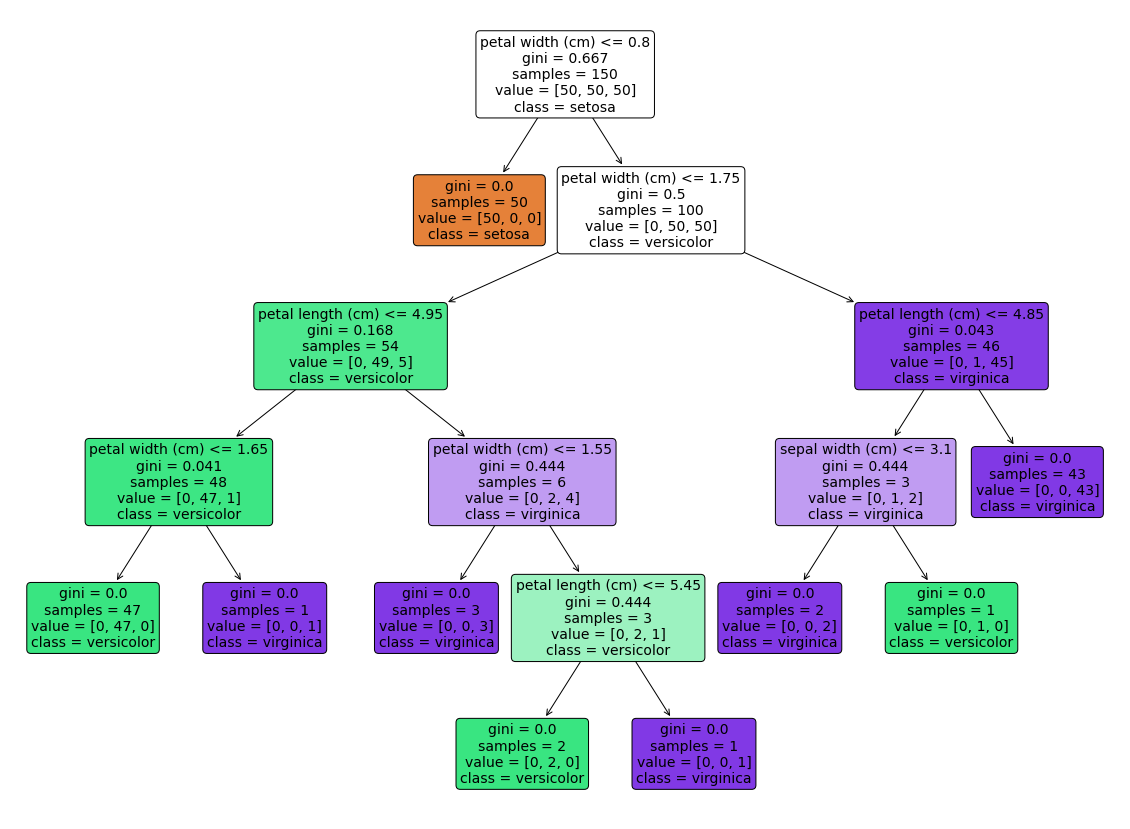

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
tree.plot_tree(model, filled=True,
feature_names=iris.feature_names,
class_names=iris.target_names,
rounded=True, fontsize=14)

plt.show()

### RandomForestClassifier

Ensemble Learning

• 앙상블(ensemble)기법 - 여러 개의 결정 트리로부터 나온 예측 결과들의 평균이나 다수의 예측 결과를 이용하는 방법

• 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
• 여러 개의 기본 모델 (weak learner, classifier, base learner, single learner)을 활용하여 하나의 새로운 모델을 만들어 내는 개념

• 다양한 learner를 만들면 전체의 모델의 성능이 증가 할 수 있음

• 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

• 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타냄

• 앙상블 학습의 유형 - 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)

• 보팅(Voting) - 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식

• 배깅(Bagging) - 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식  
대표적인 방식이 Random Forest

• 부스팅(Boosting) - 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에
대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치를 부여하여 학습과 예측을 진행하는 방식

• 스태킹(Stacking) - 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재 학습시켜 결과를 예측하는 방법

#### 랜덤 포레스트 분류기 훈련
• RandomForestClassifier
랜덤 포레스트는 많은 결정 트리를 훈련하지만 각 트리는 부트스트랩 샘플을 사용  
다수의 결정 트리들을 학습하는 앙상블 방법
검출, 분류, 회귀 등 다양한 문제에 활용되고 있다.  
각 노드는 최적의 분할을 결정할 때 특성의 일부만 사용  

max_features : 각 노드에서 사용할 특성의 최대 개수를 결정 (정수(특성의 수), 실수(특성 개수 비율), sqrt(특성
개수의 제곱근)를 입력할 수 있다. 기본값은 auto로 sqrt와 동작이 같습니다.)   

bootstrap : 트리에 사용할 샘플을 중복을 허용한 샘플링으로 만들지 아닐지를 결정   

n_estimators : 랜덤 포레스트에서 만들 결정 트리 개수를 지정 (의사결정트리의 개수 k의 값)  

n_jobs : 학습을 수행하기 위해 병렬적으로 사용될 CPU 코어 개수 (n_jobs=-1 설정은 모든 코어를 사용 )  
의사결정트리를 만드는 횟수 k는 생성되는 의사결정트리의 개수이며, 이 값이 커지면 예측 결과의 품질을 더 좋게 해주지만 컴퓨터의 성능 문제를 일으킬 수 있다.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
print(iris.target_names)
print(iris.feature_names)
print(iris.data[0:5])
print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
# 랜덤 포레스트 분류기 객체를 만듭니다. 
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
model = randomforest.fit(features, target) # 모델 훈련

observation = [[ 5, 4, 3, 2]] # 새로운 샘플을 만듭니다. 
model.predict(observation) # 샘플 클래스를 예측합니다.

# 엔트로피를 사용하여 랜덤 포레스트 분류기 객체를 만듭니다. 
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)
model_entropy = randomforest_entropy.fit(features, target) # 모델 훈련

In [23]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(clf.predict([[3, 5, 4, 2]])) #예측 결과?

Accuracy: 0.9777777777777777
[1]


No handles with labels found to put in legend.


petal length (cm)    0.467531
petal width (cm)     0.410729
sepal length (cm)    0.097357
sepal width (cm)     0.024383
dtype: float64


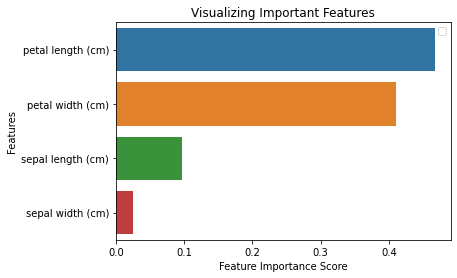

In [26]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print(feature_imp)

import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

#### 랜덤 포레스트에서 중요한 특성 선택하기
• 모델의 분산을 감소시키거나 가장 중요한 특성만 사용하여 모델을 이해하기 쉽게 만들어야 하는 경우 모델의 특성 개
수를 감소시켜야 합니다

• 사이킷런에서는 두 단계의 워크플로를 사용하여 줄어든 특성으로 모델을 만들 수 있습니다.

1. 모든 특성을 사용해 랜덤 포레스트 모델을 훈련합니다.
2. 중요한 특성만 포함된 새로운 특성 행렬을 만듭니다.  
( SelectFromModel 클래스를 사용해 threshold 값보다 중요도가 크거나 같은 특성만 포함된 특성 행렬을 만듭니다.)
3. 중요한 특성만을 사용한 새로운 모델을 훈련합니다.

• 단점 : 원-핫 인코딩된 순서가 없는 범주형 특성의 중요도는 여러 개의 이진 특성으로 희석됩니다.
상관관계가 높은 특성의 중요도는 양쪽 특성에 고루 분산되는 것이 아니라 한 특성에 집중됩니다.

In [27]:
# 랜덤 포레스트에서 중요한 특성 선택하기
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

clf = RandomForestClassifier(random_state=0, n_jobs=-1) # 랜덤 포레스트 분류기 객체 생성

# 특성 중요도가 임계값보다 크거나 같은 특성으로 객체를 만듭니다.
selector = SelectFromModel(randomforest, threshold=0.3)

# selector를 사용하여 새로운 특성 행렬을 만듭니다.
features_important = selector.fit_transform(features, target)

X_train, X_test, y_train, y_test = train_test_split(features_important, target, test_size=0.3)

# 가장 중요한 특성을 사용하여 랜덤 포레스트 모델을 훈련합니다.
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


#### 불균형한 클래스 다루기

• 불균형한 클래스를 적절히 처리하지 않으면 모델의 성능을 감소시킬 수 있습니다

• 사이킷런의 많은 머신러닝 알고리즘은 불균형한 클래스를 바로 잡을 수 있는 방법을 내장하고 있습니다.

• RandomForestClassifier의 class_weight 매개변수 - 불균형한 클래스를 교정

클래스 이름과 원하는 상대적 가중치를 딕셔너리로 만들어 주입하면 그에 따라 RandomForestClassifier가 클래스에 가중치를 부여합니다.

매개변수값 balanced옵션은 데이터에 등장한 비율의 역수로 클래스 가중치를 자동으로 부여

In [28]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target
features = features[40:,:] # 처음 40개의 샘플을 제거, 불균형한 데이터 생성
target = target[40:] #
# 0인 클래스 이외에는 모두 1인 타깃 벡터를 만듭니다.
target = np.where((target == 0), 0, 1)

randomforest = RandomForestClassifier( random_state=0, n_jobs=-1, class_weight="balanced")
model = randomforest.fit(features, target) # 모델 훈련
110/(2*10) # 작은 클래스의 가중치를 계산
110/(2*100) # 큰 클래스의 가중치를 계산

0.55

#### 부스팅을 사용한 성능 향상

• 결정 트리나 랜덤 포레스트보다 더 높은 성능를 가진 모델

• AdaBoost 부스팅 형식은 이전 모델이 잘못 예측한 샘플에 높은 우선순위를 부여하는 식으로 약한 모델을 연속적으로 훈련합니다.

In [41]:
from sklearn.ensemble import AdaBoostClassifier

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50,
                        learning_rate=1)

model = abc.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [34]:
from sklearn.svm import SVC

svc = SVC(probability=True, kernel='linear')
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


• base_estimator : 약한 모델을 훈련하는 데 사용할 학습 알고리즘 (기본값은 결정 트리)

• n_estimators : 반복적으로 훈련할 모델의 개수

• learning_rate : 각 모델이 부여하는 가중치 정도 (기본값은 1) 학습률을 감소하면 가중치 감소나 증가량이 줄어들기 때문에 모델의 훈련 속도를 느리게 만듭니다.

• loss : 가중치를 업데이트할 때 사용하는 손실 함수를 지정 (AdaBoostRegressor에만 해당)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

adaboost = AdaBoostClassifier(random_state=0) # 에이다부스트 트리 분류기의 객체 생성

model = adaboost.fit(X_train, y_train) ## 모델 훈련

y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


• AdaBoostClassifier - 예측할 때 각 학습기에 부여된 가중치를 더하여 가장 높은 점수의 클래스가 예측 결과가 됩니다.

• AdaBoostRegressor - 개별 학습기의 결과를 정렬하여 예측기 가중치의 누적값이 중간 지점에 있는 결과를 사용

• Graident Boosting - AdaBoost와 달리 이전 학습기가 만든 잔여 오차에 새로운 트리를 훈련하는 방식으로 앙상블 모델을 구성하여 높은 성능을 냅니다.

• GradientBoostingClassifier와 GradientBoostingRegressor 모두 깊이가 3이고 criterion이 'friedman_mse'인  
DecisionTreeRegressor를 사용합니다

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# 그래디언트 부스팅 분류기의 객체를 만듭니다.
gradientboost = GradientBoostingClassifier(random_state=0)

model = gradientboost.fit(X_train, y_train) # 모델 훈련

y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


• 히스토그램 기반의 그레이디언트 부스팅 : XGBoost, LightGBM 라이브러리에 구현된 HistGradientBoostingClassifier
와 HistGradientBoostingRegressor

• 훈련 데이터를 정수 구간(bin)으로 변환한 후 훈련

• GradientBoosting 보다 빠름

• max_bins(구간의 최대 개수 지정)의 기본값은 256

In [37]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# 히스토그램 기반의 그래디언트 부스팅 분류기의 객체를 만듭니다.
histgradientboost = HistGradientBoostingClassifier(random_state=0)

model = histgradientboost.fit(X_train, y_train) # 모델 훈련

y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


### K-Nearest Neighbor

#### kNN(k-Nearest Neighbors)

• 지도 학습에 활용되는 가장 단순한 종류의 알고리즘

• 기술적으로 예측을 만들기 위해 모델을 훈련하지 않고 가장 가까운 k 개의 샘플에서 다수의 클래스를 그 샘플의
클래스로 예측

• Nearest Neighbour - 새로운 멤버와 가장 가깝게 위치하는 멤버가 속해 있는 그룹으로 분류

• 주어진 개수만큼 가까운 멤버들과 비교하여 판단하는 방법을 k-Nearest Neighbours 알고리즘이라 부릅니다.

• 주어지는 멤버 개수를 k로 표현

• 가까운 멤버에는 가중치를 높게, 멀리 떨어져 있는 멤버에는 가중치를 낮게 하는 것이 바람직합니다.

In [53]:
wine = datasets.load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [59]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [55]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [56]:
print(wine.data.shape)

(178, 13)


In [57]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5) # 모델 훈련
knn.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333
